In [ ]:
pip install gradio

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
import gradio as gr
warnings.filterwarnings("ignore")

from string import punctuation
import re

import nltk
from nltk.corpus import stopwords
#stopwords.words('english')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

In [ ]:
faq =pd.read_csv('/content/drive/MyDrive/ML Data Sets & Projects/Mental_Health_FAQ.csv')
faq.shape


(98, 3)

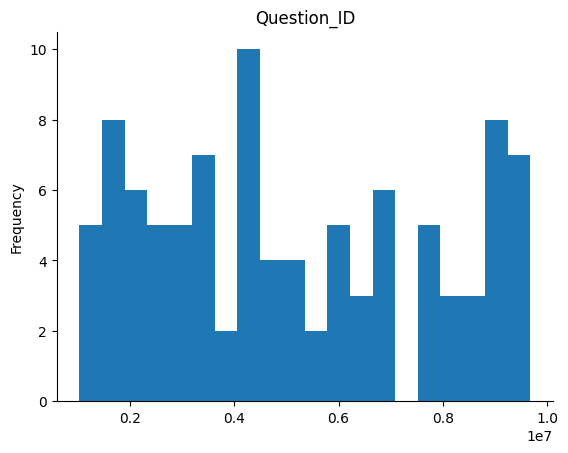

In [ ]:
from matplotlib import pyplot as plt
faq['Question_ID'].plot(kind='hist', bins=20, title='Question_ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
faq_quest = faq[['Question_ID', 'Questions']]
faq_answ = faq[['Question_ID', 'Answers']]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(faq['Questions'], faq['Answers'], test_size=0.2, random_state=42)

In [ ]:
def to_lower(text):
    return text.lower()

In [ ]:
contractions_dict = {
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not",
"don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",
"he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I had", "I'd've": "I would have",
"I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it had",
"it'd've": "it would have", "it'll": "it will", "it'll've": "iit will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
"must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
"o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
"sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she had", "she'd've": "she would have", "she'll": "she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not",
"shouldn't've": "should not have", "so've": "so have", "so's": "so is", "that'd": "that had", "that'd've": "that would have",
"that's": "that is", "there'd": "there had", "there'd've": "there would have", "there's": "there is", "they'd": "they had",
"they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are",
"they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we had", "we'd've": "we would have",
"we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not",
"what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have",
"when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
"who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is",
"why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have",
"wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
"y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have", "you'd": "you had",
"you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

def expand_contraction(text, contraction_dict):
    contraction_pattern= re.compile('({})'.format('|'.join(contraction_dict.keys())), flags= re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match= contraction.group(0)
        first_char= match[0]
        expanded_contraction= contraction_dict.get(match) \
            if contraction_dict.get(match) \
            else contraction_dict.get(match.lower())
        expanded_contraction= expanded_contraction
        return expanded_contraction

    expanded_text= contraction_pattern.sub(expand_match, text)
    expanded_text= re.sub("'","", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contraction(text, contractions_dict)
    return text

In [ ]:
def remove_number(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [ ]:
def remove_punct(text):
    return "".join(c for c in text if c not in punctuation)

In [ ]:
def to_strip(text):
    return " ".join([c for c in text.split() if len(c)>2])

In [ ]:
def remove_char(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    return text

In [ ]:
def remove_duplicate(text):
    text = re.sub("(.)\\1{2,}", "\\1", text)
    return text

In [ ]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

def remove_stopwords(text):
    stop_words= stopwords.words('english')

    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lemma = WordNetLemmatizer()

def lemma(text):
    lemmatize_words = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return ' '.join(lemmatize_words)

In [ ]:
faq_quest['prep1']= faq_quest['Questions'].apply(to_lower)
faq_quest['prep2']= faq_quest['prep1'].apply(main_contraction)
faq_quest['prep3']= faq_quest['prep2'].apply(remove_number)
faq_quest['prep4']= faq_quest['prep3'].apply(remove_punct)
faq_quest['prep5']= faq_quest['prep4'].apply(to_strip)
faq_quest['prep6']= faq_quest['prep5'].apply(remove_char)
faq_quest['prep7']= faq_quest['prep6'].apply(remove_duplicate)
faq_quest['prep8']= faq_quest['prep7'].apply(remove_stopwords)
faq_quest['lemma']= faq_quest['prep8'].apply(lemma)


In [ ]:
questions_lemmatized = pd.DataFrame(faq_quest['lemma'])
questions_lemmatized.rename(columns = {'lemma':'FAQs'}, inplace = True)
questions_lemmatized.head(10)

In [ ]:
from matplotlib import pyplot as plt
faq_quest['Question_ID'].plot(kind='line', figsize=(8, 4), title='Question_ID')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
faq_answ['prep1']= faq_answ['Answers'].apply(to_lower)
faq_answ['prep2']= faq_answ['prep1'].apply(main_contraction)
faq_answ['prep3']= faq_answ['prep2'].apply(remove_number)
faq_answ['prep4']= faq_answ['prep3'].apply(remove_punct)
faq_answ['prep5']= faq_answ['prep4'].apply(to_strip)
faq_answ['prep6']= faq_answ['prep5'].apply(remove_char)
faq_answ['prep7']= faq_answ['prep6'].apply(remove_duplicate)
faq_answ['prep8']= faq_answ['prep7'].apply(remove_stopwords)
faq_answ['lemma']= faq_answ['prep8'].apply(lemma)


In [ ]:
answers_lemmatized = pd.DataFrame(faq_answ['lemma'])
answers_lemmatized.rename(columns = {'lemma':'Answers'}, inplace = True)
answers_lemmatized.head(10)

In [ ]:
def dictionary(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    dictionary = pd.DataFrame({'word': check.index, 'freq': check.values})
    dictionary.index = dictionary['word']
    dictionary.drop('word', axis = 1, inplace=True)
    dictionary.sort_values('freq', inplace= True, ascending= False)

    return dictionary

dictionary_clean = dictionary(questions_lemmatized['FAQs'])
dictionary_clean[:30].plot(kind = 'barh',figsize = (10,10))

In [ ]:
def dictionary(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    dictionary = pd.DataFrame({'word': check.index, 'freq': check.values})
    dictionary.index = dictionary['word']
    dictionary.drop('word', axis = 1, inplace=True)
    dictionary.sort_values('freq', inplace= True, ascending= False)

    return dictionary

dictionary_clean = dictionary(answers_lemmatized['Answers'])
dictionary_clean[:30].plot(kind = 'barh',figsize = (10,10))

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize= (20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')

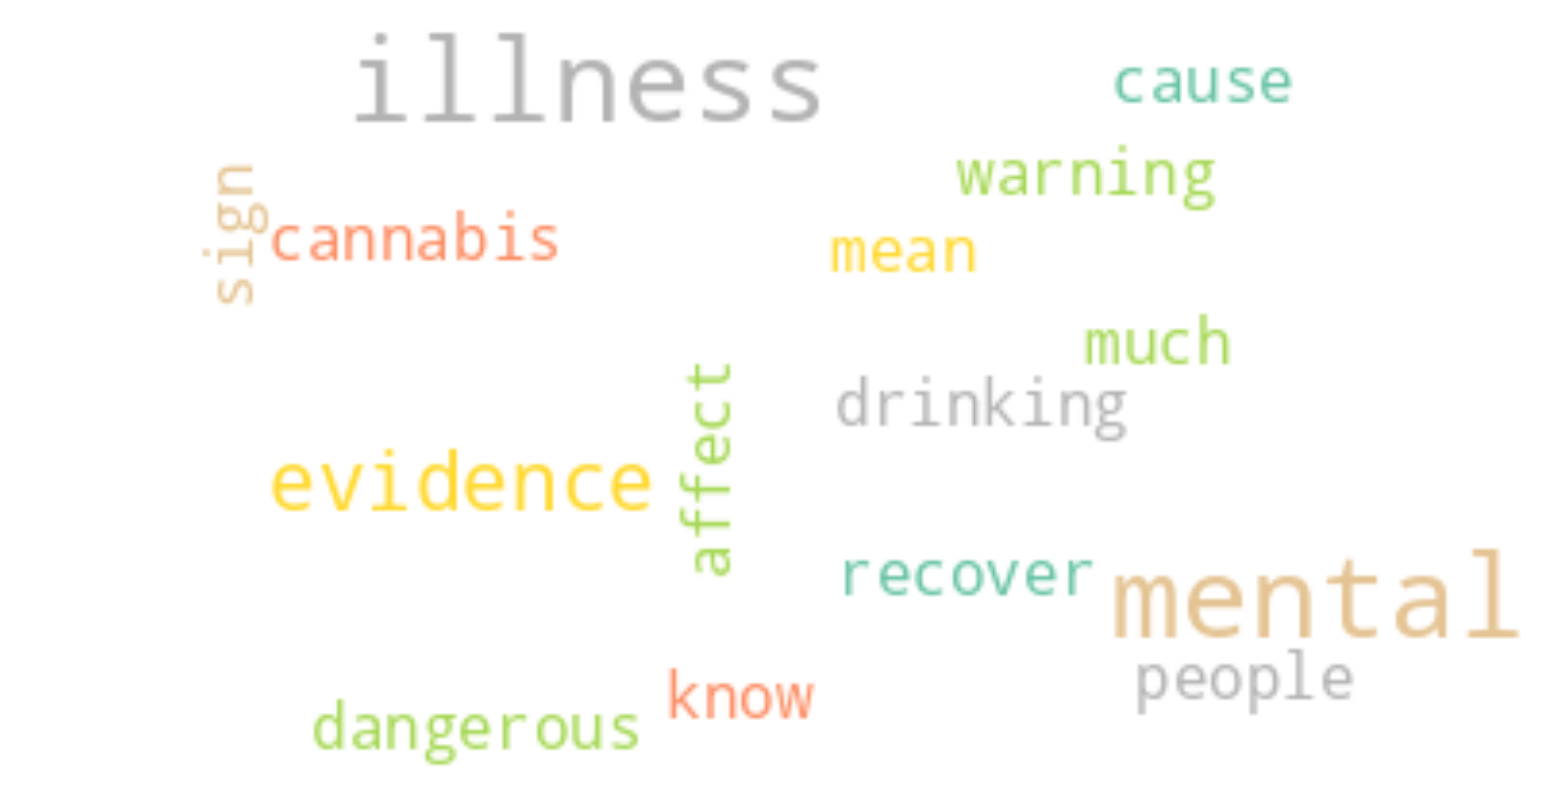

In [ ]:
word_cloud= WordCloud(max_font_size=30, max_words=15, background_color="white", colormap ='Set2', collocations = False, stopwords = stopwords.words('english')).generate(str(faq_quest['lemma']))
plot_cloud(word_cloud)


In [ ]:
word_cloud= WordCloud(max_font_size=30, max_words=15, background_color="white", colormap='Set2', collocations= False, stopwords= stopwords.words('english')).generate(str(faq_answ['lemma']))
plot_cloud(word_cloud)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
faq['AnswersEncode'] = label.fit_transform(faq['Answers'])
faq

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [ ]:
text = faq['Questions']
y_train= faq['AnswersEncode'].values

In [ ]:
tfidf = TfidfVectorizer(use_idf=True, analyzer='word', stop_words='english', token_pattern=r'\b[^\d\W]+\b', ngram_range=(1,2))
X_train = tfidf.fit_transform(text)
print(X_train)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
X_train_dense = X_train.toarray()


In [ ]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train_dense, y_train, test_size=0.2, random_state=42)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_split, y_train_split, epochs=35, batch_size=32, validation_split=0.35)

Epoch 1/35
2/2 [==============================] - 1s 198ms/step - loss: 0.1386 - accuracy: 0.9600 - val_loss: 8.2420 - val_accuracy: 0.1429
Epoch 2/35
2/2 [==============================] - 0s 33ms/step - loss: 0.1288 - accuracy: 0.9400 - val_loss: 8.3587 - val_accuracy: 0.1071
Epoch 3/35
2/2 [==============================] - 0s 32ms/step - loss: 0.1222 - accuracy: 0.9400 - val_loss: 8.4763 - val_accuracy: 0.1071
Epoch 4/35
2/2 [==============================] - 0s 30ms/step - loss: 0.1155 - accuracy: 0.9600 - val_loss: 8.5933 - val_accuracy: 0.1071
Epoch 5/35
2/2 [==============================] - 0s 30ms/step - loss: 0.1082 - accuracy: 0.9600 - val_loss: 8.7041 - val_accuracy: 0.1071
Epoch 6/35
2/2 [==============================] - 0s 31ms/step - loss: 0.1051 - accuracy: 0.9600 - val_loss: 8.8138 - val_accuracy: 0.1071
Epoch 7/35
2/2 [==============================] - 0s 32ms/step - loss: 0.0998 - accuracy: 0.9600 - val_loss: 8.9179 - val_accuracy: 0.1071
Epoch 8/35
2/2 [==========

In [ ]:
search_test = [
    "Depression"
]

search_engine = tfidf.transform(search_test).toarray()
predictions = model.predict(search_engine)
predicted_classes = np.argmax(predictions, axis=1)

for class_index in predicted_classes:
    faq_data = faq.loc[faq['AnswersEncode'] == class_index]
    print("Answer:", faq_data['Answers'].values)


1/1 [==============================] - 0s 57ms/step
Answer: ['We naturally want to help a loved one who isn’t feeling well. How we can or should help may seem fairly obvious when a loved one experiences a physical health problem, but many people say they’re not sure how to best help when a loved one experiences a mental illness like depression. Here are some tips: \n You don’t have to understand exactly what someone else is experiencing, you just need to recognize that it’s a difficult experience. You can try something like, “I can see that this experience or these symptoms are really painful for you,” or, “I’m sorry to hear that you’re feeling unwell.” If you have experienced depression yourself, you might say, “I know how you feel.” Just remember that everyone experiences illnesses like depression differently, and empathy is about recognizing the impact of the illness, not comparing symptoms. \n You don’t have to be an expert, but learning more about depression can help you understan

In [ ]:
import gradio as gr

def predict_answer(question):
    # Preprocessing steps
    question_prep1 = to_lower(question)
    question_prep2 = main_contraction(question_prep1)
    question_prep3 = remove_number(question_prep2)
    question_prep4 = remove_punct(question_prep3)
    question_prep5 = to_strip(question_prep4)
    question_prep6 = remove_char(question_prep5)
    question_prep7 = remove_duplicate(question_prep6)
    question_prep8 = remove_stopwords(question_prep7)
    question_lemma = lemma(question_prep8)
    question_vector = tfidf.transform([question_lemma])
    answer_encoded = model.predict([question_vector])
    answer = label.inverse_transform([answer_encoded])[0]

    return answer

iface = gr.Interface(fn=predict_answer, inputs="text", outputs="text", title="Mental Health FAQ")
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5d2f8c27d3b555770a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
